In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 한글 설정
# pip install koreanize_matplotlib
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# root = 'C:/workspace/python/project/data/'
root = 'G:/workspace/python/python_project/data/'

# 구글드라이브 : https://drive.google.com/drive/folders/1zIzm1o8-3uxcWSU2DoWpB8aV0Oxdfz_P?usp=sharing

In [2]:
'''
주거실태 데이터 프레임

국가통계포털 > 검색 (주택의 종류별 주택)
https://kosis.kr/search/search.do
https://kosis.kr/search/search.do;jsessionid=Ptk5Fb2aTBhtchTbG153Wf14awChdrNQHCT1gkY59HZ8gh6iv5J4VjNkZUkPQzZJ.STAT_SIGA2_servlet_engine1
'''
abode_house_category = pd.read_csv(root + '주거실태_Data/주택의_종류별_주택__읍면동_연도_끝자리_0__5___시군구_그_외_연도__20241120174542.csv', encoding = 'cp949')

In [3]:
# 주거실태 정보 확인
abode_house_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역별(읍면동)  27 non-null     object
 1   2021        27 non-null     object
 2   2021.1      27 non-null     object
 3   2021.2      27 non-null     object
 4   2021.3      27 non-null     object
 5   2021.4      27 non-null     object
 6   2021.5      27 non-null     object
 7   2021.6      27 non-null     object
 8   2021.7      27 non-null     object
 9   2021.8      27 non-null     object
 10  2022        27 non-null     object
 11  2022.1      27 non-null     object
 12  2022.2      27 non-null     object
 13  2022.3      27 non-null     object
 14  2022.4      27 non-null     object
 15  2022.5      27 non-null     object
 16  2022.6      27 non-null     object
 17  2022.7      27 non-null     object
 18  2022.8      27 non-null     object
 19  2023        27 non-null     object
 20  2023.1      

In [4]:
'''
0 행 삭제 클래스
'''
class ManagedDataFrame:
    def __init__(self, name, df):
        self.name = name
        self.df = df
        self.row_deleted = False  # 플래그 초기화

    def delete_row_once(self):
        if not self.row_deleted and 0 in self.df.index:
            self.df = self.df.drop(0)
            self.row_deleted = True
            print(f"{self.name}: 0행이 삭제되었습니다.")
        else:
            print(f"{self.name}: 삭제 작업이 이미 완료되었거나 0행이 없습니다.")

    # 객체 출력 시 사용자 정의 내용 반환
    def __repr__(self):
        return f"ManagedDataFrame(name={self.name}, row_deleted={self.row_deleted}, df=\n{self.df}\n)"

In [5]:
abode_house_category[:10]

,행정구역별(읍면동),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,...,2022.8,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8
0,행정구역별(읍면동),주택,단독주택-계,단독주택-일반,단독주택-다가구,단독주택-영업겸용,아파트,연립주택,다세대주택,비주거용 건물 내 주택,...,비주거용 건물 내 주택,주택,단독주택-계,단독주택-일반,단독주택-다가구,단독주택-영업겸용,아파트,연립주택,다세대주택,비주거용 건물 내 주택
1,서울특별시,3068494,299473,62648,185338,51487,1818214,110239,812403,28165,...,27401,3155331,291582,59966,180233,51383,1886515,111038,838895,27301
2,종로구,46885,11987,6367,4013,1607,15775,5490,12725,908,...,881,47025,11620,6095,3931,1594,16300,5544,12695,866
3,중구,42319,5865,2218,2388,1259,26327,1896,7370,861,...,833,44191,5735,2164,2340,1231,28126,1873,7625,832
4,용산구,75739,13716,4794,7193,1729,38631,3911,18785,696,...,665,77734,13370,4666,7010,1694,39806,3921,19978,659
5,성동구,91033,9916,1820,6337,1759,68090,1976,10031,1020,...,970,91252,9345,1719,5930,1696,68191,2017,10735,964
6,광진구,91432,15096,613,11478,3005,32571,4119,38226,1420,...,1394,95286,14861,617,11243,3001,35072,4173,39797,1383
7,동대문구,104287,16388,4083,9512,2793,66512,3287,16569,1531,...,1498,110169,16085,3988,9333,2764,71810,3301,17465,1508
8,중랑구,114488,17995,1701,12967,3327,56651,4423,33916,1503,...,1484,119961,17698,1662,12720,3316,59984,4465,36336,1478
9,성북구,140138,21661,9240,9476,2945,80967,6230,29900,1380,...,1353,143240,20848,8772,9148,2928,83728,6362,30957,1345


In [6]:
category_2021 = abode_house_category.columns.str.contains('2021')
category_2021[0] = True

category_2022 = abode_house_category.columns.str.contains('2022')
category_2022[0] = True

category_2023 = abode_house_category.columns.str.contains('2023')
category_2023[0] = True

In [7]:
abode_house_category_2021_df = abode_house_category.loc[:, category_2021]
abode_house_category_2022_df = abode_house_category.loc[:, category_2022]
abode_house_category_2023_df = abode_house_category.loc[:, category_2023]

house_col_2021 = abode_house_category_2021_df.loc[0].values
house_col_2022 = abode_house_category_2022_df.loc[0].values
house_col_2023 = abode_house_category_2023_df.loc[0].values

abode_house_category_2021_df.columns = house_col_2021
abode_house_category_2022_df.columns = house_col_2022
abode_house_category_2023_df.columns = house_col_2023

display(abode_house_category_2021_df[:3])
display(abode_house_category_2022_df[:3])
display(abode_house_category_2023_df[:3])

,행정구역별(읍면동),주택,단독주택-계,단독주택-일반,단독주택-다가구,단독주택-영업겸용,아파트,연립주택,다세대주택,비주거용 건물 내 주택
0,행정구역별(읍면동),주택,단독주택-계,단독주택-일반,단독주택-다가구,단독주택-영업겸용,아파트,연립주택,다세대주택,비주거용 건물 내 주택
1,서울특별시,3068494,299473,62648,185338,51487,1818214,110239,812403,28165
2,종로구,46885,11987,6367,4013,1607,15775,5490,12725,908


,행정구역별(읍면동),주택,단독주택-계,단독주택-일반,단독주택-다가구,단독주택-영업겸용,아파트,연립주택,다세대주택,비주거용 건물 내 주택
0,행정구역별(읍면동),주택,단독주택-계,단독주택-일반,단독주택-다가구,단독주택-영업겸용,아파트,연립주택,다세대주택,비주거용 건물 내 주택
1,서울특별시,3111323,293489,60861,181399,51229,1851242,110418,828773,27401
2,종로구,46810,11823,6259,3959,1605,15923,5532,12651,881


,행정구역별(읍면동),주택,단독주택-계,단독주택-일반,단독주택-다가구,단독주택-영업겸용,아파트,연립주택,다세대주택,비주거용 건물 내 주택
0,행정구역별(읍면동),주택,단독주택-계,단독주택-일반,단독주택-다가구,단독주택-영업겸용,아파트,연립주택,다세대주택,비주거용 건물 내 주택
1,서울특별시,3155331,291582,59966,180233,51383,1886515,111038,838895,27301
2,종로구,47025,11620,6095,3931,1594,16300,5544,12695,866


In [8]:
abode_house_category_2021_df = ManagedDataFrame('abode_house_category_2021', abode_house_category_2021_df)
abode_house_category_2022_df = ManagedDataFrame('abode_house_category_2022', abode_house_category_2022_df)
abode_house_category_2023_df = ManagedDataFrame('abode_house_category_2023', abode_house_category_2023_df)

abode_house_category_2021_df.delete_row_once()
abode_house_category_2022_df.delete_row_once()
abode_house_category_2023_df.delete_row_once()

abode_house_category_2021: 0행이 삭제되었습니다.
abode_house_category_2022: 0행이 삭제되었습니다.
abode_house_category_2023: 0행이 삭제되었습니다.


In [9]:
abode_house_category_2021_df = abode_house_category_2021_df.df
abode_house_category_2022_df = abode_house_category_2022_df.df
abode_house_category_2023_df = abode_house_category_2023_df.df

In [10]:
abode_house_category_2021_df.columns

Index(['행정구역별(읍면동)', '주택', '단독주택-계', '단독주택-일반', '단독주택-다가구', '단독주택-영업겸용', '아파트',
       '연립주택', '다세대주택', '비주거용 건물 내 주택'],
      dtype='object')

In [11]:
abode_house_category_2021_df[:5]

,행정구역별(읍면동),주택,단독주택-계,단독주택-일반,단독주택-다가구,단독주택-영업겸용,아파트,연립주택,다세대주택,비주거용 건물 내 주택
1,서울특별시,3068494,299473,62648,185338,51487,1818214,110239,812403,28165
2,종로구,46885,11987,6367,4013,1607,15775,5490,12725,908
3,중구,42319,5865,2218,2388,1259,26327,1896,7370,861
4,용산구,75739,13716,4794,7193,1729,38631,3911,18785,696
5,성동구,91033,9916,1820,6337,1759,68090,1976,10031,1020


In [12]:
abode_house_category_2022_df[:5]

,행정구역별(읍면동),주택,단독주택-계,단독주택-일반,단독주택-다가구,단독주택-영업겸용,아파트,연립주택,다세대주택,비주거용 건물 내 주택
1,서울특별시,3111323,293489,60861,181399,51229,1851242,110418,828773,27401
2,종로구,46810,11823,6259,3959,1605,15923,5532,12651,881
3,중구,42401,5751,2166,2346,1239,26366,1879,7572,833
4,용산구,77116,13450,4698,7054,1698,39805,3887,19309,665
5,성동구,90740,9410,1733,5966,1711,68125,2058,10177,970


In [13]:
abode_house_category_2023_df[:5]

,행정구역별(읍면동),주택,단독주택-계,단독주택-일반,단독주택-다가구,단독주택-영업겸용,아파트,연립주택,다세대주택,비주거용 건물 내 주택
1,서울특별시,3155331,291582,59966,180233,51383,1886515,111038,838895,27301
2,종로구,47025,11620,6095,3931,1594,16300,5544,12695,866
3,중구,44191,5735,2164,2340,1231,28126,1873,7625,832
4,용산구,77734,13370,4666,7010,1694,39806,3921,19978,659
5,성동구,91252,9345,1719,5930,1696,68191,2017,10735,964


In [14]:
abode_house_category_2021_df = abode_house_category_2021_df.rename(columns={'행정구역별(읍면동)':'구'})
abode_house_category_2022_df = abode_house_category_2022_df.rename(columns={'행정구역별(읍면동)':'구'})
abode_house_category_2023_df = abode_house_category_2023_df.rename(columns={'행정구역별(읍면동)':'구'})

In [15]:
'''
def drop_columns_once(df, column_names):
    if not hasattr(drop_columns_once, "executed"):
        drop_columns_once.executed = False

    if not drop_columns_once.executed:
        # 컬럼 삭제
        result = df.drop(columns=column_names)
        drop_columns_once.executed = True
        return result
    else:
        print("This function can only be executed once.")
        return df
'''

'\ndef drop_columns_once(df, column_names):\n    if not hasattr(drop_columns_once, "executed"):\n        drop_columns_once.executed = False\n\n    if not drop_columns_once.executed:\n        # 컬럼 삭제\n        result = df.drop(columns=column_names)\n        drop_columns_once.executed = True\n        return result\n    else:\n        print("This function can only be executed once.")\n        return df\n'

In [16]:
abode_house_category_2021_df = abode_house_category_2021_df.drop(columns=["단독주택-일반", "단독주택-다가구", "단독주택-영업겸용"])
abode_house_category_2022_df = abode_house_category_2022_df.drop(columns=["단독주택-일반", "단독주택-다가구", "단독주택-영업겸용"])
abode_house_category_2023_df = abode_house_category_2023_df.drop(columns=["단독주택-일반", "단독주택-다가구", "단독주택-영업겸용"])

In [17]:
abode_house_category_2021_df = abode_house_category_2021_df.rename(columns={'주택':'계'})
abode_house_category_2022_df = abode_house_category_2022_df.rename(columns={'주택':'계'})
abode_house_category_2023_df = abode_house_category_2023_df.rename(columns={'주택':'계'})

abode_house_category_2021_df = abode_house_category_2021_df.rename(columns={'단독주택-계':'단독주택'})
abode_house_category_2022_df = abode_house_category_2022_df.rename(columns={'단독주택-계':'단독주택'})
abode_house_category_2023_df = abode_house_category_2023_df.rename(columns={'단독주택-계':'단독주택'})

abode_house_category_2021_df = abode_house_category_2021_df.rename(columns={'비주거용 건물 내 주택':'비주거용주택'})
abode_house_category_2022_df = abode_house_category_2022_df.rename(columns={'비주거용 건물 내 주택':'비주거용주택'})
abode_house_category_2023_df = abode_house_category_2023_df.rename(columns={'비주거용 건물 내 주택':'비주거용주택'})

In [18]:
display(abode_house_category_2021_df)

,구,계,단독주택,아파트,연립주택,다세대주택,비주거용주택
1,서울특별시,3068494,299473,1818214,110239,812403,28165
2,종로구,46885,11987,15775,5490,12725,908
3,중구,42319,5865,26327,1896,7370,861
4,용산구,75739,13716,38631,3911,18785,696
5,성동구,91033,9916,68090,1976,10031,1020
6,광진구,91432,15096,32571,4119,38226,1420
7,동대문구,104287,16388,66512,3287,16569,1531
8,중랑구,114488,17995,56651,4423,33916,1503
9,성북구,140138,21661,80967,6230,29900,1380
10,강북구,97840,17261,34875,4834,39859,1011


In [19]:
display(abode_house_category_2022_df)

,구,계,단독주택,아파트,연립주택,다세대주택,비주거용주택
1,서울특별시,3111323,293489,1851242,110418,828773,27401
2,종로구,46810,11823,15923,5532,12651,881
3,중구,42401,5751,26366,1879,7572,833
4,용산구,77116,13450,39805,3887,19309,665
5,성동구,90740,9410,68125,2058,10177,970
6,광진구,93555,14901,33862,4158,39240,1394
7,동대문구,106441,16110,68445,3298,17090,1498
8,중랑구,118357,17751,59121,4466,35535,1484
9,성북구,142602,20892,83701,6146,30510,1353
10,강북구,99477,17134,35997,4867,40483,996


In [20]:
display(abode_house_category_2023_df)

,구,계,단독주택,아파트,연립주택,다세대주택,비주거용주택
1,서울특별시,3155331,291582,1886515,111038,838895,27301
2,종로구,47025,11620,16300,5544,12695,866
3,중구,44191,5735,28126,1873,7625,832
4,용산구,77734,13370,39806,3921,19978,659
5,성동구,91252,9345,68191,2017,10735,964
6,광진구,95286,14861,35072,4173,39797,1383
7,동대문구,110169,16085,71810,3301,17465,1508
8,중랑구,119961,17698,59984,4465,36336,1478
9,성북구,143240,20848,83728,6362,30957,1345
10,강북구,100418,17068,36541,4903,40911,995


In [21]:
abode_house_category_2021_df['계']           = abode_house_category_2021_df['계'].astype(int)
abode_house_category_2021_df['단독주택']     = abode_house_category_2021_df['단독주택'].astype(int)
abode_house_category_2021_df['아파트']       = abode_house_category_2021_df['아파트'].astype(int)
abode_house_category_2021_df['연립주택']     = abode_house_category_2021_df['연립주택'].astype(int)
abode_house_category_2021_df['다세대주택']   = abode_house_category_2021_df['다세대주택'].astype(int)
abode_house_category_2021_df['비주거용주택'] = abode_house_category_2021_df['비주거용주택'].astype(int)

In [22]:
abode_house_category_2022_df['계']           = abode_house_category_2022_df['계'].astype(int)
abode_house_category_2022_df['단독주택']     = abode_house_category_2022_df['단독주택'].astype(int)
abode_house_category_2022_df['아파트']       = abode_house_category_2022_df['아파트'].astype(int)
abode_house_category_2022_df['연립주택']     = abode_house_category_2022_df['연립주택'].astype(int)
abode_house_category_2022_df['다세대주택']   = abode_house_category_2022_df['다세대주택'].astype(int)
abode_house_category_2022_df['비주거용주택'] = abode_house_category_2022_df['비주거용주택'].astype(int)

In [23]:
abode_house_category_2023_df['계']           = abode_house_category_2023_df['계'].astype(int)
abode_house_category_2023_df['단독주택']     = abode_house_category_2023_df['단독주택'].astype(int)
abode_house_category_2023_df['아파트']       = abode_house_category_2023_df['아파트'].astype(int)
abode_house_category_2023_df['연립주택']     = abode_house_category_2023_df['연립주택'].astype(int)
abode_house_category_2023_df['다세대주택']   = abode_house_category_2023_df['다세대주택'].astype(int)
abode_house_category_2023_df['비주거용주택'] = abode_house_category_2023_df['비주거용주택'].astype(int)

In [24]:
abode_house_category_2021_df[:5]
abode_house_category_2022_df[:5]
abode_house_category_2023_df[:5]

,구,계,단독주택,아파트,연립주택,다세대주택,비주거용주택
1,서울특별시,3155331,291582,1886515,111038,838895,27301
2,종로구,47025,11620,16300,5544,12695,866
3,중구,44191,5735,28126,1873,7625,832
4,용산구,77734,13370,39806,3921,19978,659
5,성동구,91252,9345,68191,2017,10735,964


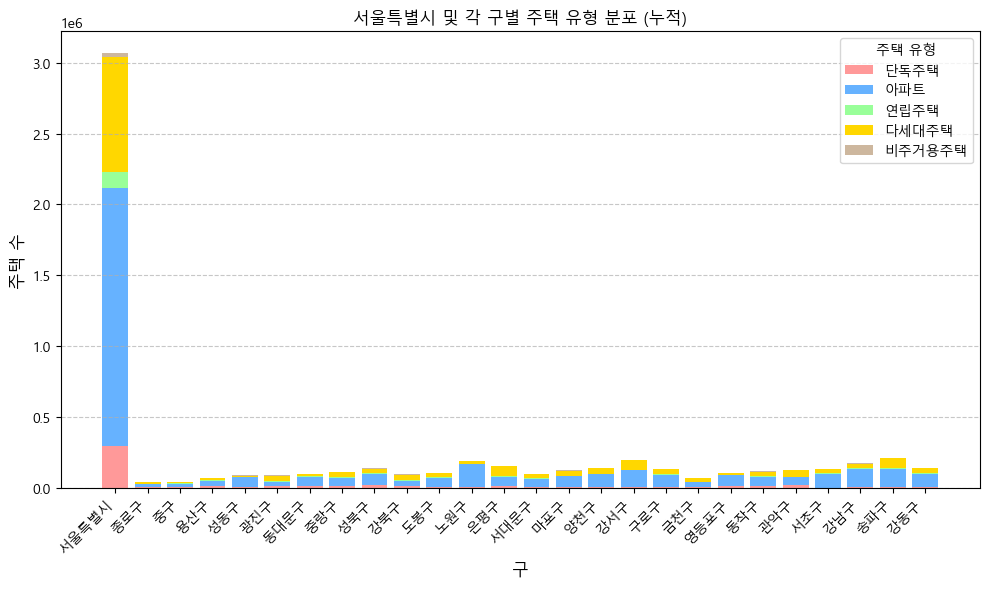

In [25]:
# 그래프 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 막대그래프 그리기
categories = ['단독주택', '아파트', '연립주택', '다세대주택', '비주거용주택']
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#CDB79E']

df = abode_house_category_2021_df

# 누적 막대그래프 생성
bottom_values = None
for i, category in enumerate(categories):
    ax.bar(df['구'], df[category], label=category, bottom=bottom_values, color=colors[i])
    bottom_values = df[category] if bottom_values is None else bottom_values + df[category]

# 그래프 꾸미기
ax.set_title('서울특별시 및 각 구별 주택 유형 분포 (누적)', fontsize=12)
ax.set_xlabel('구', fontsize=12)
ax.set_ylabel('주택 수', fontsize=12)
ax.legend(title='주택 유형')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# X축 레이블 각도 설정
plt.xticks(rotation=45, ha='right')  # 각도 45도, 오른쪽 정렬

# 출력
plt.tight_layout()
plt.show()

In [26]:
df_2021 = pd.DataFrame(abode_house_category_2021_df)
df_2021['년도'] = 2021
df_2022 = pd.DataFrame(abode_house_category_2022_df)
df_2022['년도'] = 2022
df_2023 = pd.DataFrame(abode_house_category_2023_df)
df_2023['년도'] = 2023

# 데이터프레임 병합
df_combined = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)
# 결과 확인
print(df_combined)

        구        계    단독주택      아파트    연립주택   다세대주택  비주거용주택    년도
0   서울특별시  3068494  299473  1818214  110239  812403   28165  2021
1     종로구    46885   11987    15775    5490   12725     908  2021
2      중구    42319    5865    26327    1896    7370     861  2021
3     용산구    75739   13716    38631    3911   18785     696  2021
4     성동구    91033    9916    68090    1976   10031    1020  2021
..    ...      ...     ...      ...     ...     ...     ...   ...
73    관악구   130244   20630    57467    6196   44071    1880  2023
74    서초구   136528    5161    96291    5301   28630    1145  2023
75    강남구   184608    6161   138025    5645   33229    1548  2023
76    송파구   221082    7621   135448    4754   71827    1432  2023
77    강동구   151178    9410    97890    3252   39584    1042  2023

[78 rows x 8 columns]


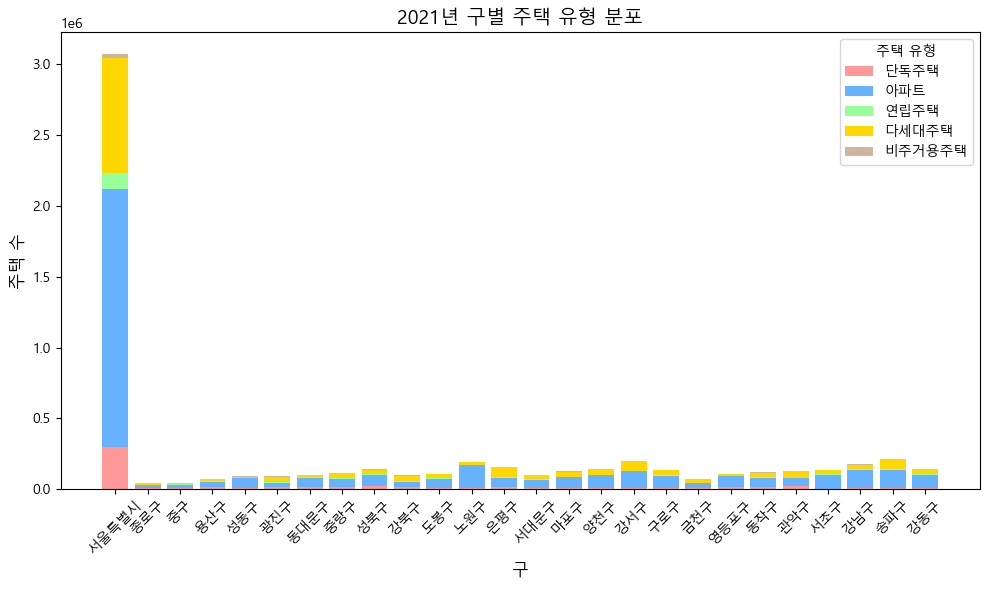

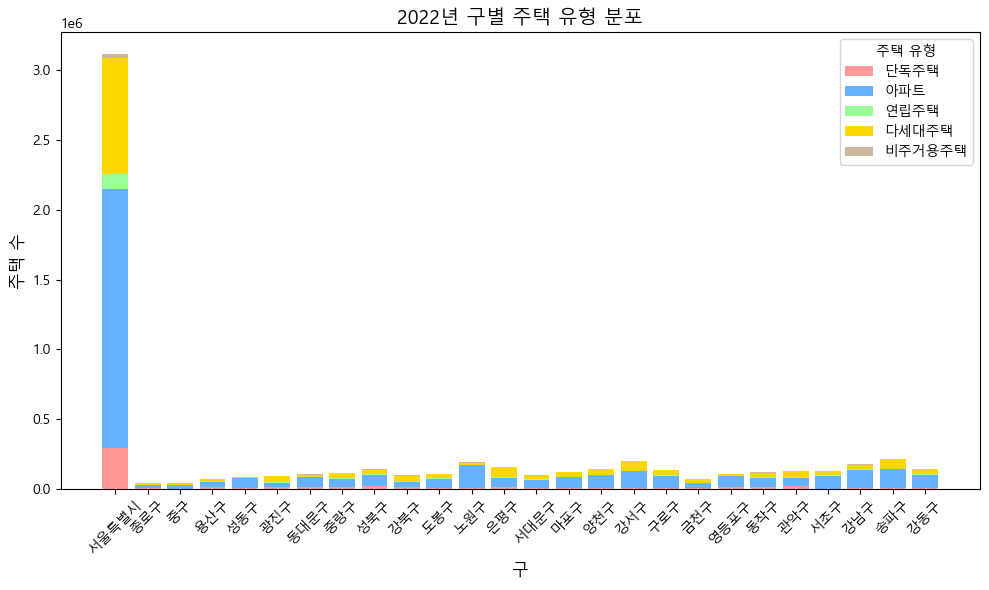

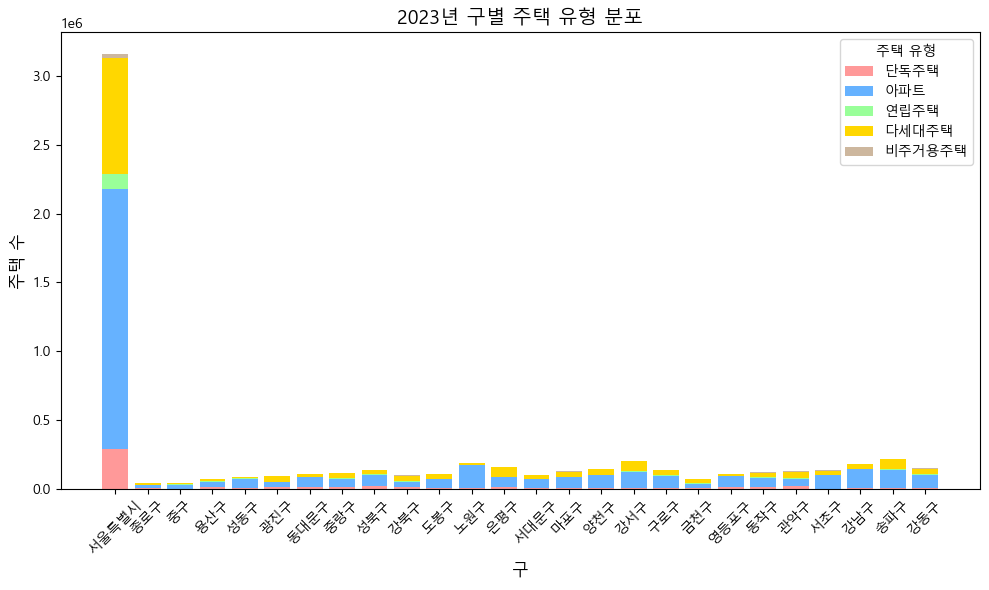

In [27]:
import matplotlib.pyplot as plt

# 년도별로 그룹화 후 시각화
years = df_combined['년도'].unique()

for year in years:
    df_year = df_combined[df_combined['년도'] == year]
    categories = ['단독주택', '아파트', '연립주택', '다세대주택', '비주거용주택']
    bottom_values = None
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#CDB79E']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, category in enumerate(categories):
        ax.bar(df_year['구'], df_year[category], label=category, bottom=bottom_values, color=colors[i])
        bottom_values = df_year[category] if bottom_values is None else bottom_values + df_year[category]
    
    ax.set_title(f'{year}년 구별 주택 유형 분포', fontsize=14)
    ax.set_xlabel('구', fontsize=12)
    ax.set_ylabel('주택 수', fontsize=12)
    ax.legend(title='주택 유형')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [28]:
# '서울특별시'를 제외한 데이터만 선택
df_filtered = df_combined[df_combined['구'] != '서울특별시']

# 결과 확인
print(df_filtered)

      구       계   단독주택     아파트  연립주택  다세대주택  비주거용주택    년도
1   종로구   46885  11987   15775  5490  12725     908  2021
2    중구   42319   5865   26327  1896   7370     861  2021
3   용산구   75739  13716   38631  3911  18785     696  2021
4   성동구   91033   9916   68090  1976  10031    1020  2021
5   광진구   91432  15096   32571  4119  38226    1420  2021
..  ...     ...    ...     ...   ...    ...     ...   ...
73  관악구  130244  20630   57467  6196  44071    1880  2023
74  서초구  136528   5161   96291  5301  28630    1145  2023
75  강남구  184608   6161  138025  5645  33229    1548  2023
76  송파구  221082   7621  135448  4754  71827    1432  2023
77  강동구  151178   9410   97890  3252  39584    1042  2023

[75 rows x 8 columns]


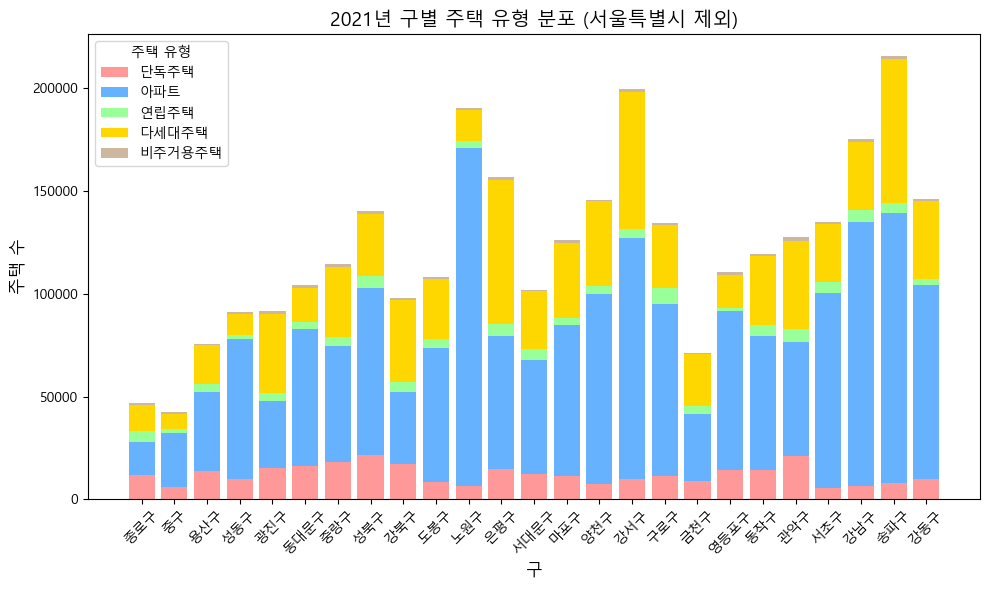

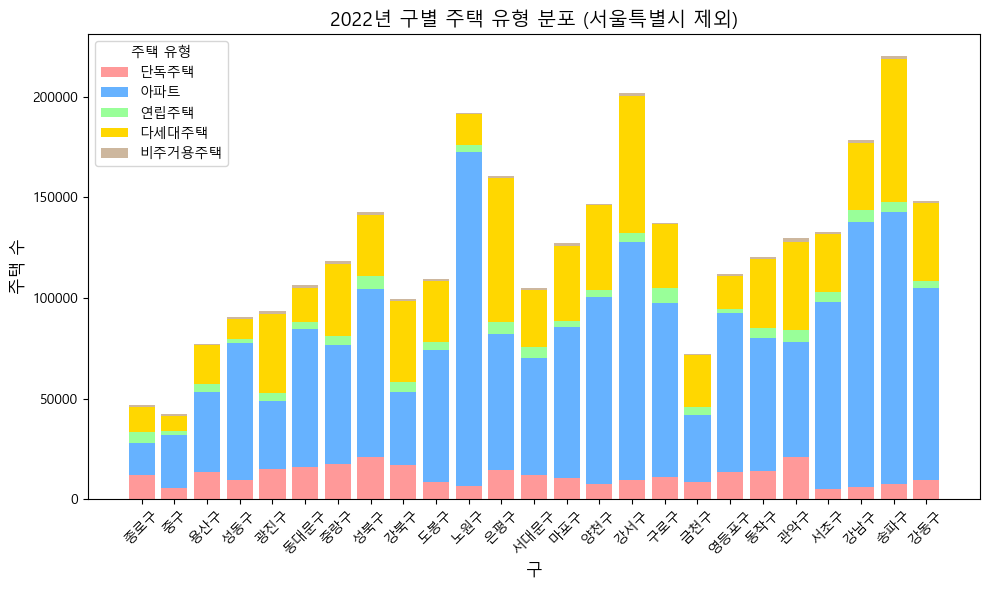

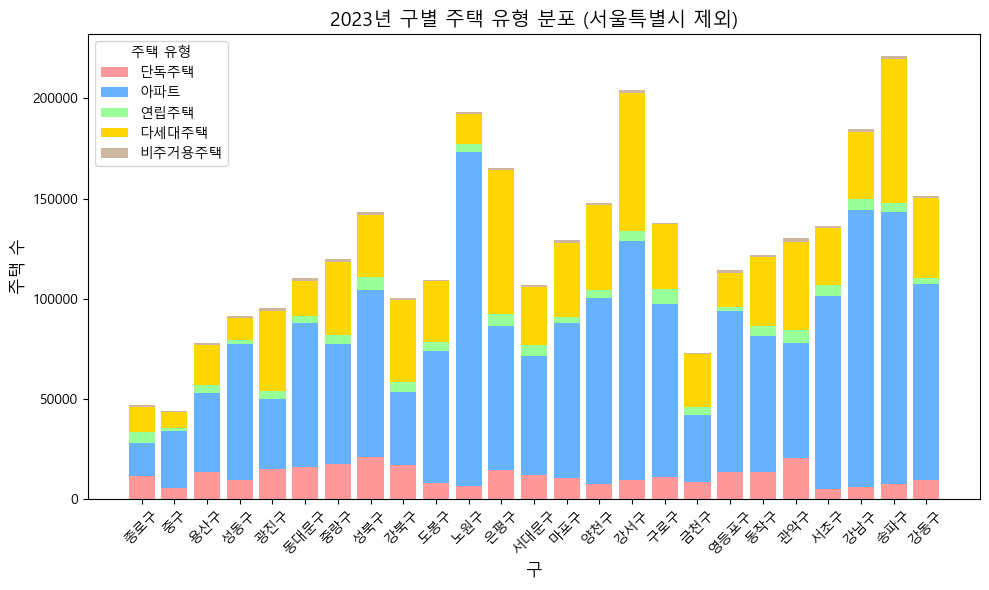

In [29]:
# 구별 주택 유형 분포
# 누적 막대그래프
years = df_filtered['년도'].unique()

for year in years:
    df_year = df_filtered[df_filtered['년도'] == year]
    categories = ['단독주택', '아파트', '연립주택', '다세대주택', '비주거용주택']
    bottom_values = None
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#CDB79E']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, category in enumerate(categories):
        ax.bar(df_year['구'], df_year[category], label=category, bottom=bottom_values, color=colors[i])
        bottom_values = df_year[category] if bottom_values is None else bottom_values + df_year[category]
    
    ax.set_title(f'{year}년 구별 주택 유형 분포 (서울특별시 제외)', fontsize=14)
    ax.set_xlabel('구', fontsize=12)
    ax.set_ylabel('주택 수', fontsize=12)
    ax.legend(title='주택 유형')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [30]:
categories = ['단독주택', '아파트', '연립주택', '다세대주택', '비주거용주택']

# 년도별 그룹화
grouped = df_combined.groupby('년도')[categories].sum()

# 비중 계산 (각 년도별 주택 유형 합계 / 해당 년도의 전체 주택 수 합계)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

print(percentages) 

          단독주택        아파트      연립주택      다세대주택    비주거용주택
년도                                                      
2021  9.759608  59.254279  3.592609  26.475626  0.917877
2022  9.432933  59.500155  3.548908  26.637318  0.880686
2023  9.240932  59.788181  3.519060  26.586593  0.865234


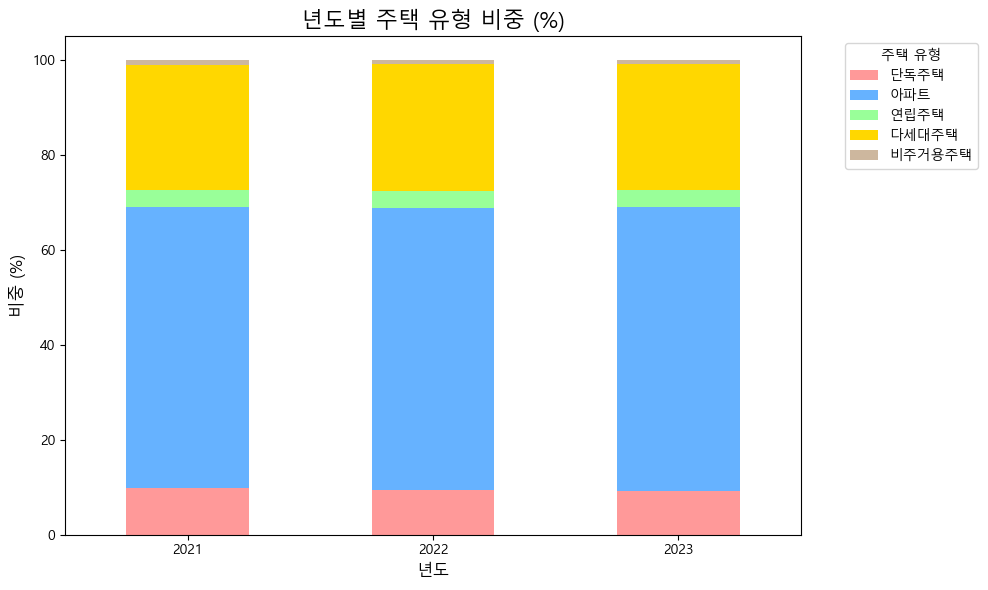

In [31]:
# 전체 데이터의 주택 유형별 비중
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#CDB79E']

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))
percentages.plot(kind='bar', stacked=True, color=colors, ax=ax)

# 그래프 꾸미기
ax.set_title('년도별 주택 유형 비중 (%)', fontsize=16)
ax.set_ylabel('비중 (%)', fontsize=12)
ax.set_xlabel('년도', fontsize=12)
ax.legend(title='주택 유형', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

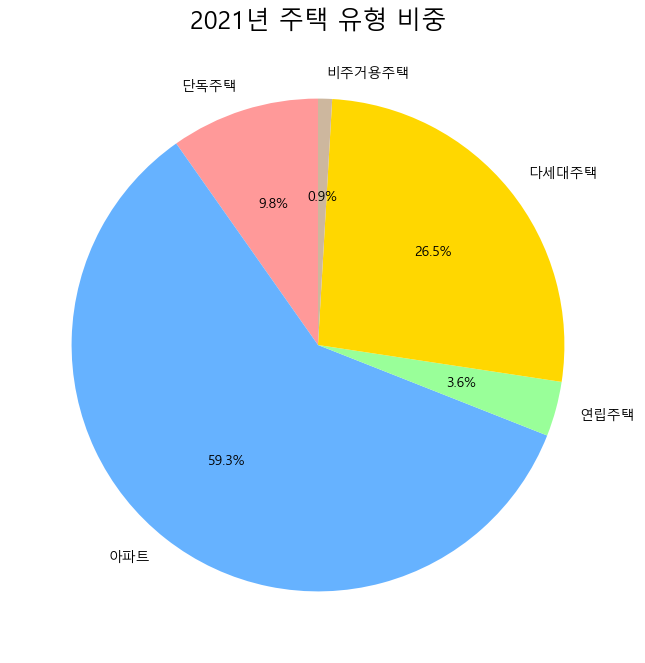

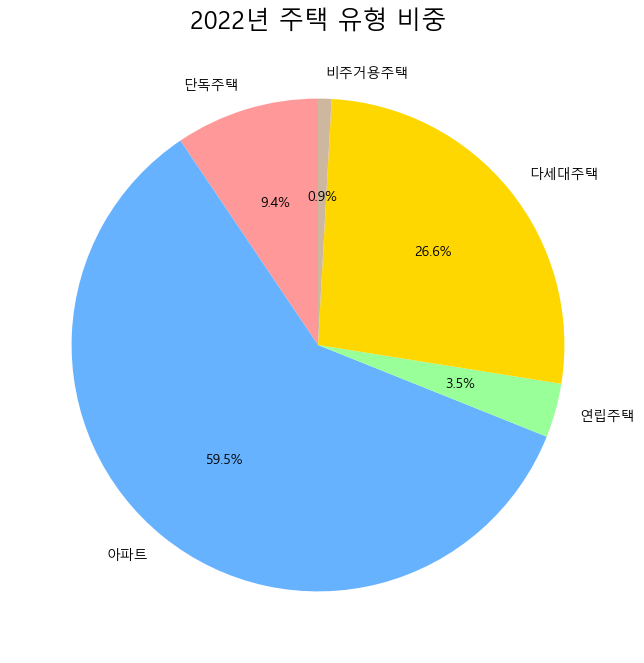

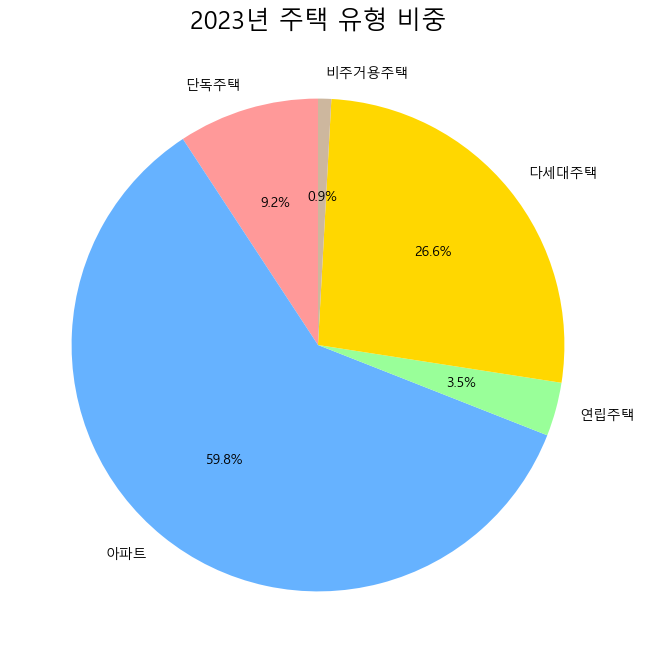

In [32]:
# 전체 데이터의 주택 유형별 비중
# 파이차트
for year, row in percentages.iterrows():
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(row, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(f'{year}년 주택 유형 비중', fontsize=18)
    plt.show()

In [33]:
df_combined

,구,계,단독주택,아파트,연립주택,다세대주택,비주거용주택,년도
0,서울특별시,3068494,299473,1818214,110239,812403,28165,2021
1,종로구,46885,11987,15775,5490,12725,908,2021
2,중구,42319,5865,26327,1896,7370,861,2021
3,용산구,75739,13716,38631,3911,18785,696,2021
4,성동구,91033,9916,68090,1976,10031,1020,2021
...,...,...,...,...,...,...,...,...
73,관악구,130244,20630,57467,6196,44071,1880,2023
74,서초구,136528,5161,96291,5301,28630,1145,2023
75,강남구,184608,6161,138025,5645,33229,1548,2023
76,송파구,221082,7621,135448,4754,71827,1432,2023


In [34]:
# 년도별-구별 전체 주택 수 데이터
grouped = df_combined.pivot(index='구', columns='년도', values='계')

print(grouped)

년도        2021     2022     2023
구                               
강남구     175536   178493   184608
강동구     146249   148323   151178
강북구      97840    99477   100418
강서구     199556   201611   203887
관악구     127783   129778   130244
광진구      91432    93555    95286
구로구     134367   137403   137863
금천구      71117    72044    72901
노원구     190352   192022   192926
도봉구     107959   109190   109465
동대문구    104287   106441   110169
동작구     119534   120374   122058
마포구     126005   127057   129421
서대문구    102024   105047   106640
서울특별시  3068494  3111323  3155331
서초구     135171   132706   136528
성동구      91033    90740    91252
성북구     140138   142602   143240
송파구     215731   220192   221082
양천구     145843   146886   147619
영등포구    110396   112068   114173
용산구      75739    77116    77734
은평구     156710   160630   165462
종로구      46885    46810    47025
중구       42319    42401    44191
중랑구     114488   118357   119961


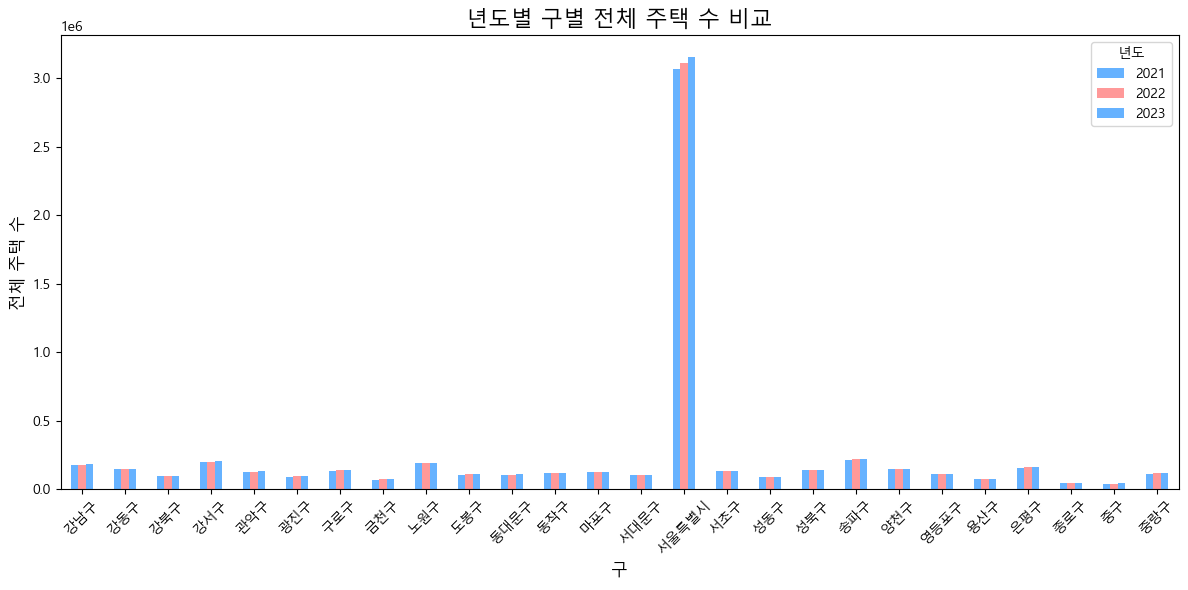

In [35]:
# 구별 전체 주택 수 비교
# 막대그래프 생성
grouped.plot(kind='bar', figsize=(12, 6), color=['#66B2FF', '#FF9999'])

# 그래프 꾸미기
plt.title('년도별 구별 전체 주택 수 비교', fontsize=16)
plt.ylabel('전체 주택 수', fontsize=12)
plt.xlabel('구', fontsize=12)
plt.legend(title='년도', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

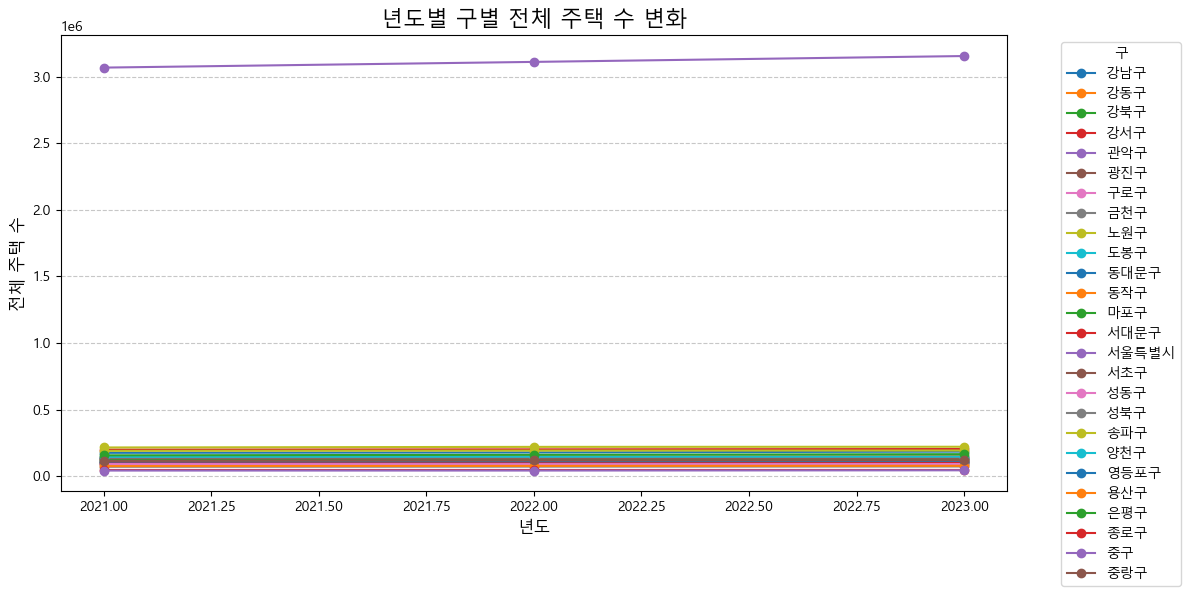

In [36]:
# 선그래프 생성
grouped.T.plot(figsize=(12, 6), marker='o')

# 그래프 꾸미기
plt.title('년도별 구별 전체 주택 수 변화', fontsize=16)
plt.ylabel('전체 주택 수', fontsize=12)
plt.xlabel('년도', fontsize=12)
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [37]:
# '서울특별시' 제외
df_filtered = df_combined[df_combined['구'] != '서울특별시']

# 년도별-구별 전체 주택 수 데이터
grouped_filtered = df_filtered.pivot(index='구', columns='년도', values='계')

print(grouped_filtered)  # 확인용 출력

년도      2021    2022    2023
구                           
강남구   175536  178493  184608
강동구   146249  148323  151178
강북구    97840   99477  100418
강서구   199556  201611  203887
관악구   127783  129778  130244
광진구    91432   93555   95286
구로구   134367  137403  137863
금천구    71117   72044   72901
노원구   190352  192022  192926
도봉구   107959  109190  109465
동대문구  104287  106441  110169
동작구   119534  120374  122058
마포구   126005  127057  129421
서대문구  102024  105047  106640
서초구   135171  132706  136528
성동구    91033   90740   91252
성북구   140138  142602  143240
송파구   215731  220192  221082
양천구   145843  146886  147619
영등포구  110396  112068  114173
용산구    75739   77116   77734
은평구   156710  160630  165462
종로구    46885   46810   47025
중구     42319   42401   44191
중랑구   114488  118357  119961


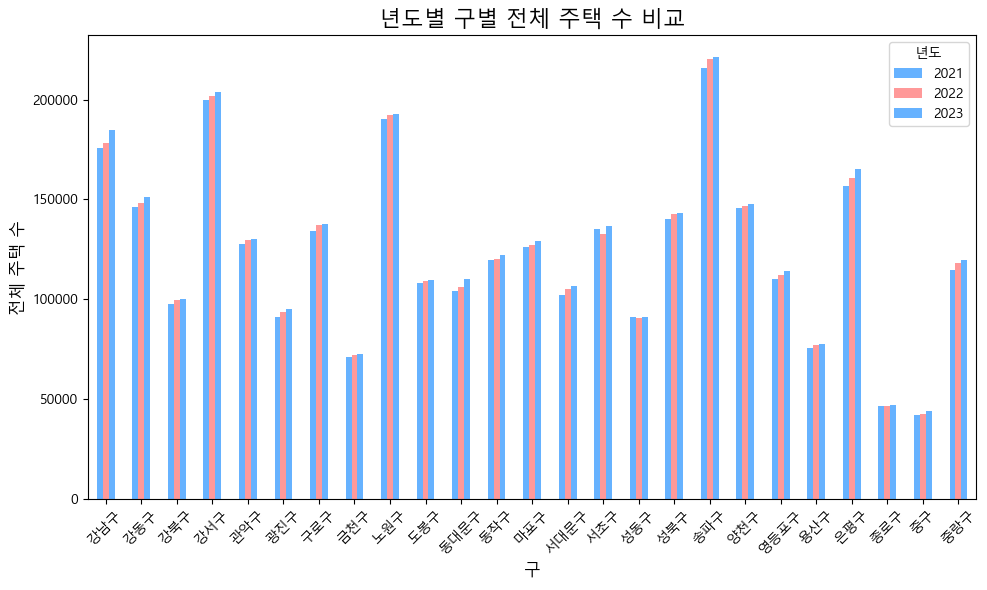

In [38]:
# 구별 전체 주택 수 비교
# 막대그래프 생성
grouped_filtered.plot(kind='bar', figsize=(10, 6), color=['#66B2FF', '#FF9999'])

# 그래프 꾸미기
plt.title('년도별 구별 전체 주택 수 비교', fontsize=16)
plt.ylabel('전체 주택 수', fontsize=12)
plt.xlabel('구', fontsize=12)
plt.legend(title='년도', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

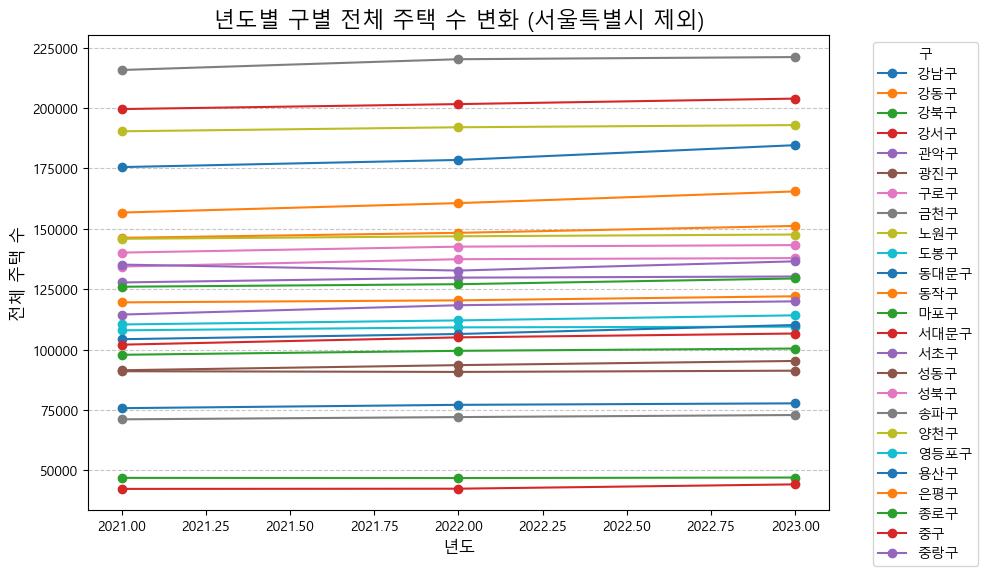

In [39]:
# 구별 전체 주택 수 비교
# 선그래프 생성
grouped_filtered.T.plot(figsize=(10, 6), marker='o')

# 그래프 꾸미기
plt.title('년도별 구별 전체 주택 수 변화 (서울특별시 제외)', fontsize=16)
plt.ylabel('전체 주택 수', fontsize=12)
plt.xlabel('년도', fontsize=12)
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [40]:
# df_filtered = df_filtered[df_filtered['구'].isin(['종로구', '중구'])]

In [41]:
# grouped_filtered = df_filtered.pivot(index='구', columns='년도', values='계')
# grouped_filtered = grouped_filtered[[2020]]  # 2020년만 선택

In [42]:
# '서울특별시' 제외
df_filtered = df_combined[df_combined['구'] != '서울특별시']

# 년도별-구별 전체 주택 수 데이터
grouped_filtered = df_filtered.pivot(index='구', columns='년도', values='계')

print(grouped_filtered)  # 확인용 출력

년도      2021    2022    2023
구                           
강남구   175536  178493  184608
강동구   146249  148323  151178
강북구    97840   99477  100418
강서구   199556  201611  203887
관악구   127783  129778  130244
광진구    91432   93555   95286
구로구   134367  137403  137863
금천구    71117   72044   72901
노원구   190352  192022  192926
도봉구   107959  109190  109465
동대문구  104287  106441  110169
동작구   119534  120374  122058
마포구   126005  127057  129421
서대문구  102024  105047  106640
서초구   135171  132706  136528
성동구    91033   90740   91252
성북구   140138  142602  143240
송파구   215731  220192  221082
양천구   145843  146886  147619
영등포구  110396  112068  114173
용산구    75739   77116   77734
은평구   156710  160630  165462
종로구    46885   46810   47025
중구     42319   42401   44191
중랑구   114488  118357  119961


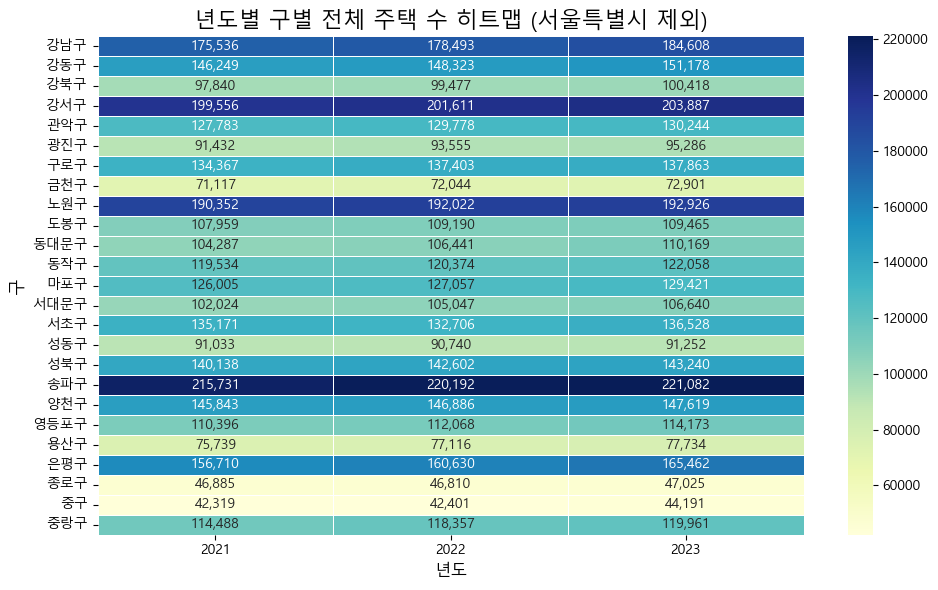

In [43]:
# 특정 주택 유형(예: 아파트) 분포
# 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(
    grouped_filtered, 
    annot=True,  # 각 셀에 값 표시
    fmt=',',     # 천 단위 콤마 표시
    cmap='YlGnBu',  # 색상 팔레트
    linewidths=0.5  # 셀 간격
)

# 그래프 꾸미기
plt.title('년도별 구별 전체 주택 수 히트맵 (서울특별시 제외)', fontsize=16)
plt.ylabel('구', fontsize=12)
plt.xlabel('년도', fontsize=12)
plt.tight_layout()

plt.show()

In [44]:
# '서울특별시' 제외
df_filtered = df_combined[df_combined['구'] != '서울특별시']

# 비주거용 주택 비율 계산 (비주거용 주택 수 / 전체 주택 수 * 100)
df_filtered['비주거용 비율 (%)'] = (df_filtered['비주거용주택'] / df_filtered['계']) * 100

# 년도별-구별 비주거용 주택 비율 데이터
grouped_ratio = df_filtered.pivot(index='구', columns='년도', values='비주거용 비율 (%)')

print(grouped_ratio)  # 확인용 출력

년도        2021      2022      2023
구                                 
강남구   0.929724  0.870062  0.838534
강동구   0.722740  0.701847  0.689254
강북구   1.033320  1.001236  0.990858
강서구   0.555734  0.532213  0.527743
관악구   1.504112  1.450169  1.443445
광진구   1.553067  1.490033  1.451420
구로구   0.619200  0.590962  0.586089
금천구   0.732596  0.705125  0.691349
노원구   0.358809  0.350481  0.346247
도봉구   0.662288  0.646579  0.638560
동대문구  1.468064  1.407352  1.368806
동작구   0.880084  0.852344  0.834849
마포구   1.195984  1.139646  1.118829
서대문구  0.885086  0.849144  0.833646
서초구   0.887025  0.862056  0.838656
성동구   1.120473  1.068988  1.056415
성북구   0.984744  0.948795  0.938984
송파구   0.692993  0.654883  0.647723
양천구   0.568419  0.552810  0.545323
영등포구  1.048045  0.990470  0.971333
용산구   0.918945  0.862337  0.847763
은평구   0.779784  0.750171  0.724638
종로구   1.936654  1.882076  1.841574
중구    2.034547  1.964576  1.882736
중랑구   1.312801  1.253834  1.232067


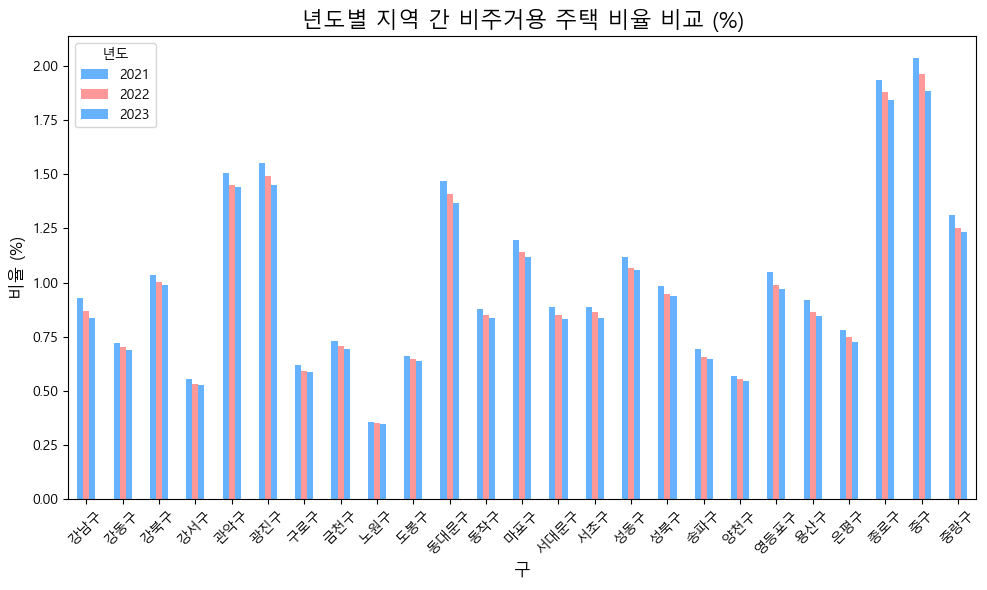

In [45]:
# 지역 간 비주거용 주택 비율 비교
# 막대그래프 생성
grouped_ratio.plot(kind='bar', figsize=(10, 6), color=['#66B2FF', '#FF9999'])

# 그래프 꾸미기
plt.title('년도별 지역 간 비주거용 주택 비율 비교 (%)', fontsize=16)
plt.ylabel('비율 (%)', fontsize=12)
plt.xlabel('구', fontsize=12)
plt.legend(title='년도', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

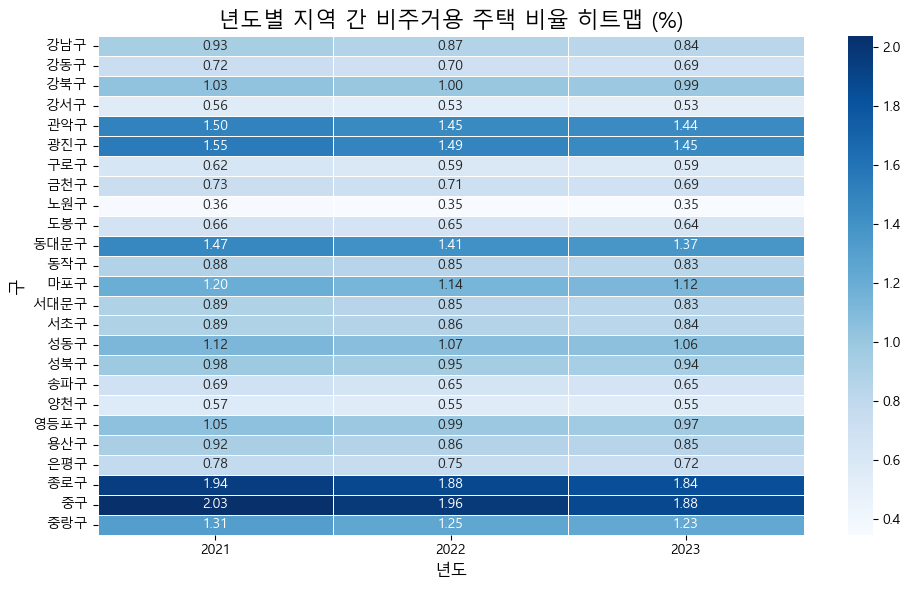

In [46]:
# 지역 간 비주거용 주택 비율 비교
# 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(
    grouped_ratio, 
    annot=True,  # 각 셀에 값 표시
    fmt='.2f',   # 소수점 둘째 자리까지 표시
    cmap='Blues',  # 색상 팔레트
    linewidths=0.5
)

# 그래프 꾸미기
plt.title('년도별 지역 간 비주거용 주택 비율 히트맵 (%)', fontsize=16)
plt.ylabel('구', fontsize=12)
plt.xlabel('년도', fontsize=12)
plt.tight_layout()

plt.show()

In [47]:
# 지도 시각화
import folium
import json
import pandas as pd

# GeoJSON 파일 로드
geo_path = 'G:/workspace/python/python_project/json/seoul_municipalities_geo.json'
with open(geo_path, encoding='utf-8') as f:
    geo_data = json.load(f)

# GeoJSON 구조 확인 (첫 번째 지역의 properties 출력)
print(geo_data['features'][0]['properties'])

# 예시 데이터프레임
df = pd.DataFrame(df_combined)

# 특정 년도 데이터 필터링 (2021년 예시)
year = 2021
df_year = df[df['년도'] == year]

# 각 주택 유형의 비율 계산
df_year['단독주택 비율'] = df_year['단독주택'] / df_year['계']
df_year['아파트 비율'] = df_year['아파트'] / df_year['계']
df_year['연립주택 비율'] = df_year['연립주택'] / df_year['계']
df_year['다세대주택 비율'] = df_year['다세대주택'] / df_year['계']
df_year['비주거용주택 비율'] = df_year['비주거용주택'] / df_year['계']

# Folium 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)  # 서울 중심 좌표

# Choropleth 추가 (주택 유형별 비율 시각화)
folium.Choropleth(
    geo_data=geo_data,
    data=df_year,
    columns=['구', '단독주택 비율'],  # 단독주택 비율
    key_on='feature.properties.SIG_KOR_NM',  # 'name'이 GeoJSON에서 지역 이름이 있는 필드라고 가정
    fill_color='YlGnBu',  # 색상 팔레트
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=f'{year}년 단독주택 비율'
).add_to(m)

# 지도 저장
# m.save('house_type_map.html')

# 지도 시각화 (Jupyter 환경에서 바로 출력)
display(m)

{'SIG_CD': '11320', 'SIG_KOR_NM': '도봉구', 'SIG_ENG_NM': 'Dobong-gu', 'ESRI_PK': 0, 'SHAPE_AREA': 0.00211, 'SHAPE_LEN': 0.239901}


In [48]:
# pip install geopandas
# import geopandas
# geopandas.__version__

In [49]:
# DataFrame 전체 데이터는
# df_combined 
# 서울특별시 제외
# df_filtered
# 사용할 것

In [50]:
# 지도 시각화
import folium
import json
import pandas as pd

# GeoJSON 파일 로드
geo_path = 'G:/workspace/python/python_project/json/seoul_municipalities_geo.json'
with open(geo_path, encoding='utf-8') as f:
    geo_data = json.load(f)

df = pd.DataFrame(df_filtered)

# 각 주택 유형의 비율 계산
df['단독주택 비율'] = df['단독주택'] / df['계']
df['아파트 비율'] = df['아파트'] / df['계']
df['연립주택 비율'] = df['연립주택'] / df['계']
df['다세대주택 비율'] = df['다세대주택'] / df['계']
df['비주거용주택 비율'] = df['비주거용주택'] / df['계']

# 각 구의 위도, 경도 계산
gdf['centroid'] = gdf.geometry.centroid  # GeoDataFrame의 각 구의 중심 좌표 계산
gdf['위도'] = gdf['centroid'].y  # 위도
gdf['경도'] = gdf['centroid'].x  # 경도

df_with_coords = pd.merge(df, gdf[['구', '위도', '경도']], on='구', how='left')
# print(df_with_coords)

# 년도별로 필터링하고 시각화
years = df_with_coords['년도'].unique()  # 년도 목록
maps = []  # 저장할 지도 객체 리스트

# Folium 지도 생성 (서울 중심 좌표)
for year in years:
    df_year = df[df['년도'] == year]

    # Folium 지도 객체 생성
    m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)  # 서울 중심 좌표
    
    # 각 주택 유형에 대해 Choropleth 추가 (단독주택, 아파트, 연립주택 등)
    for house_type in ['단독주택', '아파트', '연립주택', '다세대주택', '비주거용주택']:
        # 주택 유형 비율 컬럼 이름
        ratio_column = f'{house_type} 비율'
        
        folium.Choropleth(
            geo_data=geo_data,
            data=df_year,
            columns=['구', ratio_column],  # 구별로 해당 주택 유형 비율
            key_on='feature.properties.SIG_KOR_NM',  # GeoJSON에서 지역 이름이 있는 필드
            fill_color='YlGnBu',  # 색상 팔레트
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name=f'{year}년 {house_type} 비율'
        ).add_to(m)

    # 각 구의 이름을 지도에 추가 (tooltip 형태로 표시)
    for _, row in df_year.iterrows():
        region = gdf[gdf['구'] == row['구']]  # 해당 구의 정보를 가져옴
        folium.GeoJson(
            region.geometry,
            tooltip=row['구'],  # 구 이름을 툴팁으로 표시
            style_function=lambda feature: {
                'fillOpacity': 0,  # 영역에 색을 채우지 않음
                'weight': 0.5,
                'color': 'black'
            }
        ).add_to(m)

    # 지도 위에 행정구 이름 추가
    for _, row in df_with_coords.iterrows():
        folium.Marker(
            location=[row['위도'], row['경도']],  # 위도, 경도 리스트로 위치 지정
            icon=folium.DivIcon(html=f'<div style="font-weight: bold; font-size: 10px; color: black; white-space: nowrap;">{row["구"]}</div>')
        ).add_to(m)

    # 지도 객체를 리스트에 저장
    maps.append(m)

    # 지도 파일로 저장
    # map_filename = f'house_type_map_{year}.html'
    # m.save(map_filename)

# 모든 년도에 대한 지도를 표시하기 위해 Jupyter에서 display 사용
from IPython.display import display
for m in maps:
    display(m)

NameError: name 'gdf' is not defined

In [51]:
df_filtered

,구,계,단독주택,아파트,연립주택,다세대주택,비주거용주택,년도,비주거용 비율 (%)
1,종로구,46885,11987,15775,5490,12725,908,2021,1.936654
2,중구,42319,5865,26327,1896,7370,861,2021,2.034547
3,용산구,75739,13716,38631,3911,18785,696,2021,0.918945
4,성동구,91033,9916,68090,1976,10031,1020,2021,1.120473
5,광진구,91432,15096,32571,4119,38226,1420,2021,1.553067
...,...,...,...,...,...,...,...,...,...
73,관악구,130244,20630,57467,6196,44071,1880,2023,1.443445
74,서초구,136528,5161,96291,5301,28630,1145,2023,0.838656
75,강남구,184608,6161,138025,5645,33229,1548,2023,0.838534
76,송파구,221082,7621,135448,4754,71827,1432,2023,0.647723
